In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model

# Import from sklearn.metrics the function confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

# sing five epochs fits the model to the data
num_classes = 10
epochs = 20

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# normalize the image data in x_train and x_test (from 0 to 255)
# rescale this from 0 to 1

x_train = x_train/255

x_test= x_test/255

In [4]:
# split the training data into validation and training data 
# for cross validation
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train,test_size = 0.2,random_state = 12345)

(48000, 28, 28)


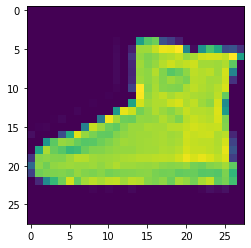

In [5]:
# visualise the image to have a look 
print(x_train.shape)

image = x_train[10,:]
plt.imshow(image)
plt.show()

In [6]:
# Define model
nrows = 28
ncols = 28
batch = 512

image_shape = (nrows, ncols, 1) # 3d with rows and columns

In [7]:
# Use the Keras Sequential approach to building neural net.
# Use the ReLU activation function for the layer
# Use 512 (2^9) units for the hidden layer.

inputLayer=Input(shape=(28,28)) 
tmp=Flatten()(inputLayer) #Will turn int a 1D array
#tmp=keras.layers.Concatenate(input,tmp)
tmp=Dense(units=512, activation='sigmoid')(tmp)
outputLayer=Dense(units=10,activation='softmax')(tmp)


In [8]:
# one-hot
from keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


In [9]:
# complie the mode 

batch = 512

model_cnn=Model(inputLayer,outputLayer)
model_cnn.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train,
              train_labels, 
              epochs=epochs, 
              batch_size=batch)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





48000/48000 [==============================] - 2s 31us/step - loss: 0.8281 - acc: 0.7251
Epoch 2/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.5411 - acc: 0.8044
Epoch 3/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.4846 - acc: 0.8247
Epoch 4/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.4518 - acc: 0.8368
Epoch 5/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.4330 - acc: 0.8415
Epoch 6/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.4135 - acc: 0.8486
Epoch 7/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.4008 - acc: 0.8531
Epoch 8/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.3876 - acc: 0.8588
Epoch 9/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.3767 - acc: 0.8

In [10]:
# Print the confusion matrix of the errors on the test data.
y_pred = model_cnn.predict(x_test)

matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

In [11]:
print(matrix)

names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
 
print('Classification Report')
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=names))

[[668   6   8  68   2   1 241   0   6   0]
 [  0 968   0  22   2   0   8   0   0   0]
 [  5   2 773  17  47   1 155   0   0   0]
 [  7  15  11 903  18   1  42   0   3   0]
 [  0   1 161  48 597   1 190   0   2   0]
 [  0   0   0   1   0 969   0  17   1  12]
 [ 54   2  78  49  31   1 779   0   6   0]
 [  0   0   0   0   0  61   0 901   0  38]
 [  3   1   2   6   4   3  17   4 960   0]
 [  0   0   0   1   0  17   1  29   0 952]]
Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.67      0.77      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.75      0.77      0.76      1000
       Dress       0.81      0.90      0.85      1000
        Coat       0.85      0.60      0.70      1000
      Sandal       0.92      0.97      0.94      1000
       Shirt       0.54      0.78      0.64      1000
     Sneaker       0.95      0.90      0.92      1000
         Bag       0.98      0.96      0.97      1000
  Ankl